<h1><center>Case Study 12: Neural Networks</center></h1>
<h3><center>Steven Cocke, Hannah Kosinovsky, Tanvi Arora</center></h3>
<h3><center>November 18th, 2019</center></h3>

<h3><center>Abstract</center></h3>

In this case study we attempted to replicate the work in the paper on "Searching for Exotic Particles in High-Energy Physics with Deep Learning" by adjusting the parameters and hyper parameters in keras to build a deep learning model.We also try to compare it with a newer optimizer. 

## 1 Introduction

Neural Networks are statistical models that were named after brain neurons. Neurons in the brain fires after a certain threshold is reached. In the statistical model, after the inputs of the model reach a certain threshold, the neuron in the model also "fires". Since we have multiple neurons in the model, it becomes a network. Each neuron in our model computes an "activation function".

These activation functions act as logistic regressors. Since the layers in the network perform these functions several times over on each previous output, the neural networks are essentially doing regressions on top of one another. 

The goal is to change the inputs such that the model has more complex indpendent components. Each neuron in the network has its own weight and bias. 

In the paper from which we are trying to replicate results, the model was pre-trained using a subset of HIGGS data consisting of 2.6 million training examples and 100,000 validation examples.A five-layer neural network with 300 hidden units in each layer, a learning rate of 0.05 and a weight decay coefficient of 1\*10<sup>-5</sup> was chosen. Following hyperparameters wre predetermined without optimization.

- Hidden units all used the *tanh* activation function
- Weights were initialized from a normal distribution with zero mean and standard deviation 0.1 in the first layer, 0.001 in the output layer, 0/05 all other hidden layers.
- Gradient computations were made on mini-batches of size 100.
- A momentum term increased linearly over the first 200 epochs from 0.9 to 0.99, at which point it remained constant.
- The learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10<sup>-6</sup>.
- Training ended when the momentum reached its maximum value and the minimum error on the validation set had not decreased by more than a factor of 0.00001 over 10 epochs. This early stopping prevented overfitting and resulted in each neural network being trained for 200-1000 epochs. 

By following the methodology for the inputs, we should be able to obtain similar accuracy. 

## 2 Methods

**SGD Optimizer with hyperparameters**  
In order to replicate these results, we had to focus on several different inputs. In the paper it was specified that they used 

<a id='weightmethods'></a>
<a href="#modelinit">Model Initialization</a>

Above link refers to below tasks :

- tanh activation functions in the hidden layers
- weights initialized from a normal distribution with zero mean and standard deviation of .1. 



- gradient computations made on mini-batches of size 100

batch size was chosen to be 100

<a id='stoppingmethods'></a>
<a href="#stopping">Early Stopping</a>

Above link refers to below tasks :

- Implementation of early stopping after a set threshold to prevent overfitting,was set based on validation loss



**adam optimizer**  
We also tried running through the same training set on the same model layers but using an adam optimizer with defaults. 


## 3 Results

In the paper, an AUC for neural networks was achieved as 0.816 and for Deep Neural Network it was 0.885. 
We were able to achieve an AUC of 0.5 only as shown in Fig. 1 below . We have used 1 million training examples due to computational efficiency.We were able to implement the learning rate and early stopping using the validation loss from the hyperparameters. We were not able to implement the change in weights using the momentum change per epochs. Although this should not have affected it so much to get a very low AUC compared to what was achieved in paper.

![sgs_auc](./images/sgd_auc.png)

<h4><center> Fig. 1 AUC Curve using SGD Optimizer with hyperparameters referred from paper</center></h4>
On the contrary we tried an 'adam' optimizer with defaults on the same training dataset , it was faster and returned an AUC of 0.82 as shown in Fig. 2 below which is very close to what was achieved in paper with lot of hyperparameters.

![adam_auc](./images/adam_auc.png)

<h4><center> Fig. 2 AUC Curve using adam Optimizer</center></h4>

## 4 Conclusions

We were not able to obtain an accuracy rate as high as the one in the paper. It is possible that there were additional inputs not accurately specified. 

Using tensorflow, using adam gave better results with defaults as well as better performance as compared to SGD optimizer which had additional parameters tuned. 
We think that we should use the newly available optimizers that are already tuned and give us better results and performance. 

## References

Paper on Deep Neural Networks used to replicate results: 
https://arxiv.org/pdf/1402.4735.pdf

Comparison of keras optimizers:
https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/

## Code

In [33]:

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics

from tensorflow.keras.regularizers import l2
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

2.0.0


In [2]:
higgs=pd.read_csv('HIGGS.csv',sep=',',header=None,nrows=1E6,dtype=np.float16)
#higgs=pd.read_csv('HIGGS.csv',sep=',',header=None,dtype=np.float16)

In [3]:
higgs.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869141,-0.635254,0.225708,0.327393,-0.689941,0.754395,-0.248535,-1.091797,0.000000,...,-0.010452,-0.045776,3.101562,1.353516,0.979492,0.978027,0.919922,0.721680,0.988770,0.876465
1,1.0,0.907715,0.329102,0.359375,1.498047,-0.312988,1.095703,-0.557617,-1.587891,2.173828,...,-1.138672,-0.000819,0.000000,0.302246,0.833008,0.985840,0.978027,0.779785,0.992188,0.798340
2,1.0,0.798828,1.470703,-1.635742,0.453857,0.425537,1.104492,1.282227,1.381836,0.000000,...,1.128906,0.900391,0.000000,0.909668,1.108398,0.985840,0.951172,0.803223,0.865723,0.780273
3,0.0,1.344727,-0.876465,0.936035,1.992188,0.882324,1.786133,-1.646484,-0.942383,0.000000,...,-0.678223,-1.360352,0.000000,0.946777,1.028320,0.998535,0.728516,0.869141,1.026367,0.958008
4,1.0,1.105469,0.321289,1.522461,0.882812,-1.205078,0.681641,-1.070312,-0.921875,0.000000,...,-0.373535,0.113037,0.000000,0.755859,1.361328,0.986816,0.837891,1.132812,0.872070,0.808594


In [4]:
higgs.columns=['class_label','lepton_pT','lepton_eta','lepton_phi','missing_energy_magnitude','missing_energy_phi','jet_1_pt','jet_1_eta','jet_1_phi','jet_1_b_tag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_b_tag','jet_3_pt','jet_3_eta','jet_3_phi','jet_3_b_tag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_b_tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']

In [5]:
higgs.head()

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869141,-0.635254,0.225708,0.327393,-0.689941,0.754395,-0.248535,-1.091797,0.000000,...,-0.010452,-0.045776,3.101562,1.353516,0.979492,0.978027,0.919922,0.721680,0.988770,0.876465
1,1.0,0.907715,0.329102,0.359375,1.498047,-0.312988,1.095703,-0.557617,-1.587891,2.173828,...,-1.138672,-0.000819,0.000000,0.302246,0.833008,0.985840,0.978027,0.779785,0.992188,0.798340
2,1.0,0.798828,1.470703,-1.635742,0.453857,0.425537,1.104492,1.282227,1.381836,0.000000,...,1.128906,0.900391,0.000000,0.909668,1.108398,0.985840,0.951172,0.803223,0.865723,0.780273
3,0.0,1.344727,-0.876465,0.936035,1.992188,0.882324,1.786133,-1.646484,-0.942383,0.000000,...,-0.678223,-1.360352,0.000000,0.946777,1.028320,0.998535,0.728516,0.869141,1.026367,0.958008
4,1.0,1.105469,0.321289,1.522461,0.882812,-1.205078,0.681641,-1.070312,-0.921875,0.000000,...,-0.373535,0.113037,0.000000,0.755859,1.361328,0.986816,0.837891,1.132812,0.872070,0.808594


In [6]:
higgs.describe()

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,NaN,NaN,0.000496,-0.000953,NaN,-0.000574,NaN,-0.000823,0.000549,NaN,...,-0.000374,-0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.0,0.274658,-2.435547,-1.742188,0.000626,-1.744141,0.138550,-2.968750,-1.741211,0.000000,...,-2.498047,-1.743164,0.000000,0.101196,0.234741,0.092224,0.157471,0.048126,0.303467,0.350830
25%,0.0,0.590820,-0.737305,-0.872070,0.576660,-0.871582,0.678711,-0.689453,-0.867676,0.000000,...,-0.714355,-0.872070,0.000000,0.790527,0.846191,0.985840,0.767578,0.673828,0.819336,0.770508
50%,1.0,0.853516,0.000920,0.000417,0.891602,-0.000799,0.894043,-0.001016,0.000715,1.086914,...,0.000372,-0.005260,0.000000,0.895020,0.950684,0.989746,0.916504,0.873535,0.947266,0.871582
75%,1.0,1.237305,0.738281,0.868652,1.292969,0.871582,1.170898,0.687012,0.870117,2.173828,...,0.714844,0.868652,3.101562,1.024414,1.083008,1.020508,1.142578,1.139648,1.140625,1.059570
max,1.0,8.710938,2.435547,1.743164,9.898438,1.743164,8.382812,2.968750,1.741211,2.173828,...,2.498047,1.743164,3.101562,31.078125,15.640625,5.921875,10.796875,13.734375,8.781250,6.257812


In [7]:
higgs.isnull().sum()

class_label                 0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_b_tag                 0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_b_tag                 0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_b_tag                 0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_b_tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [8]:
x=higgs.copy()
x=x.drop(['class_label'],axis=1)
x.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.869141,-0.635254,0.225708,0.327393,-0.689941,0.754395,-0.248535,-1.091797,0.000000,1.375000,...,-0.010452,-0.045776,3.101562,1.353516,0.979492,0.978027,0.919922,0.721680,0.988770,0.876465
1,0.907715,0.329102,0.359375,1.498047,-0.312988,1.095703,-0.557617,-1.587891,2.173828,0.812500,...,-1.138672,-0.000819,0.000000,0.302246,0.833008,0.985840,0.978027,0.779785,0.992188,0.798340
2,0.798828,1.470703,-1.635742,0.453857,0.425537,1.104492,1.282227,1.381836,0.000000,0.851562,...,1.128906,0.900391,0.000000,0.909668,1.108398,0.985840,0.951172,0.803223,0.865723,0.780273
3,1.344727,-0.876465,0.936035,1.992188,0.882324,1.786133,-1.646484,-0.942383,0.000000,2.423828,...,-0.678223,-1.360352,0.000000,0.946777,1.028320,0.998535,0.728516,0.869141,1.026367,0.958008
4,1.105469,0.321289,1.522461,0.882812,-1.205078,0.681641,-1.070312,-0.921875,0.000000,0.800781,...,-0.373535,0.113037,0.000000,0.755859,1.361328,0.986816,0.837891,1.132812,0.872070,0.808594


In [9]:
y=higgs['class_label']
y.head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: class_label, dtype: float16

### Scale Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.4514991182 and adding 0.000000


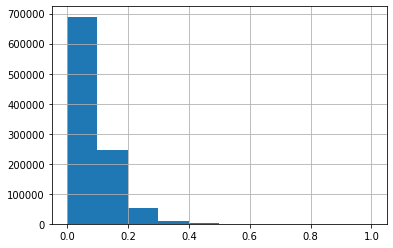

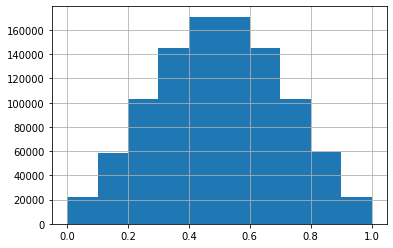

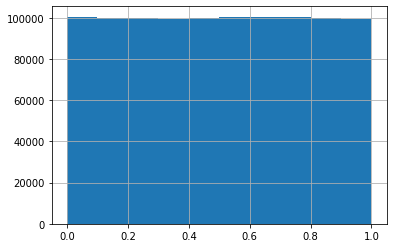

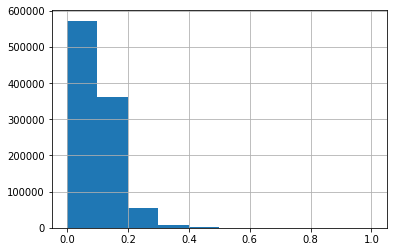

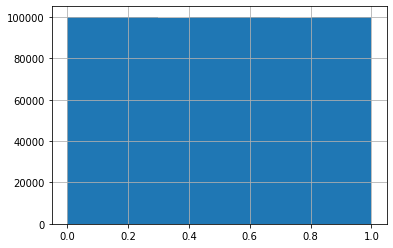

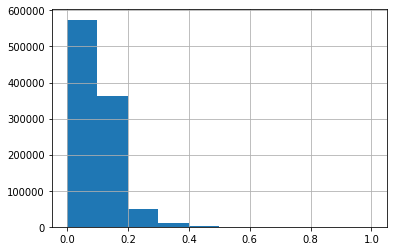

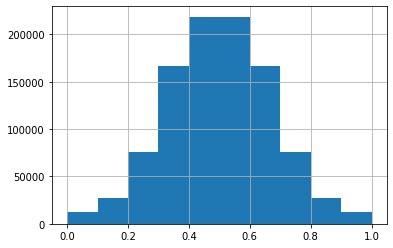

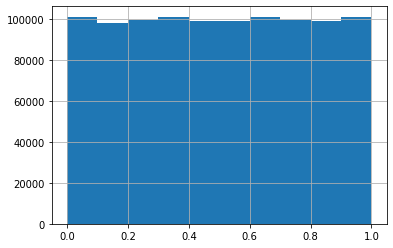

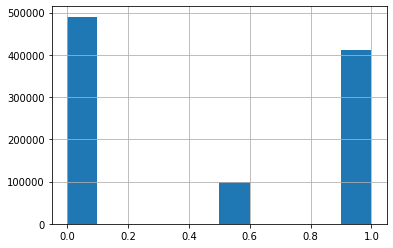

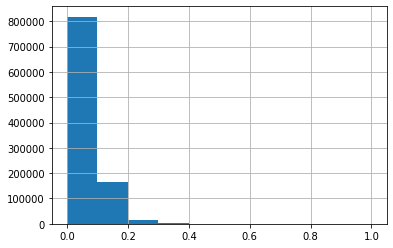

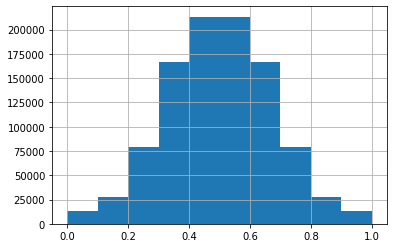

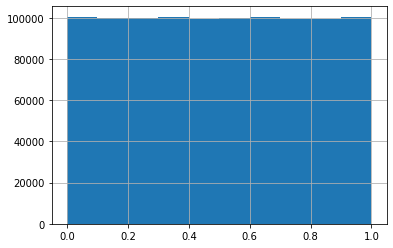

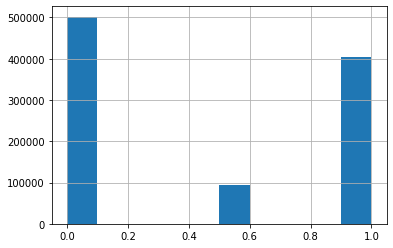

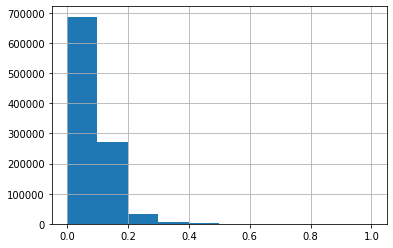

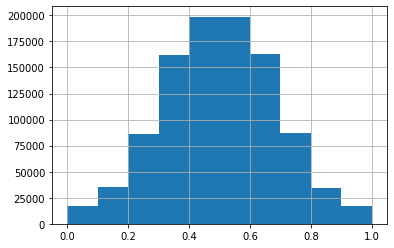

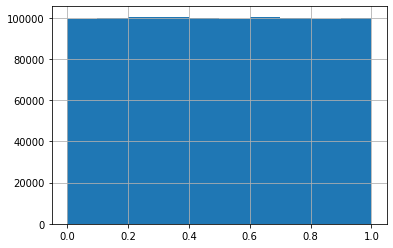

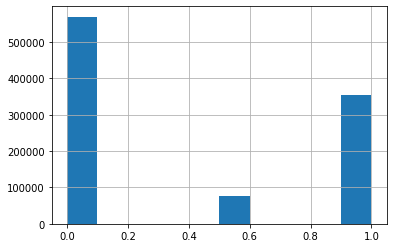

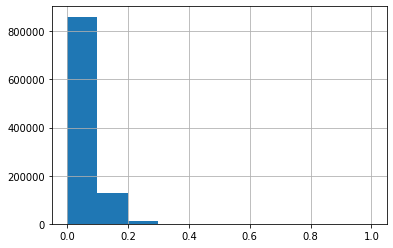

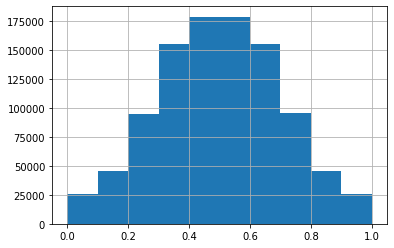

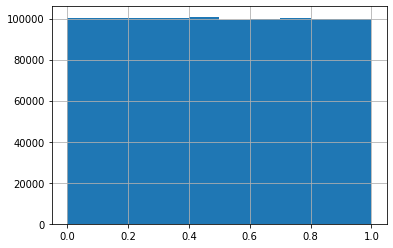

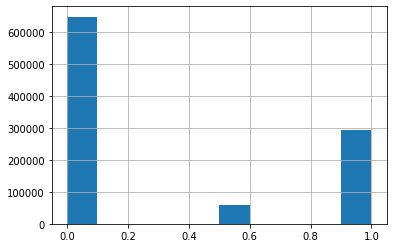

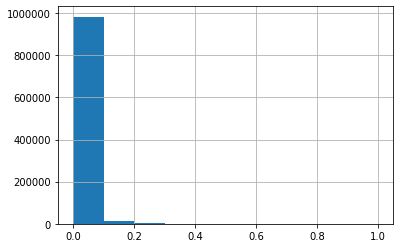

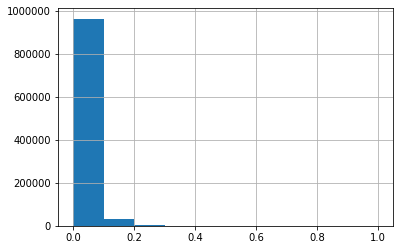

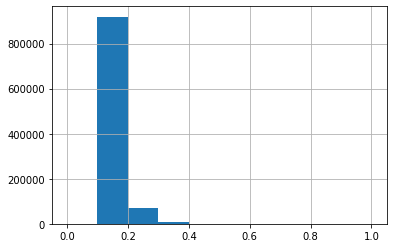

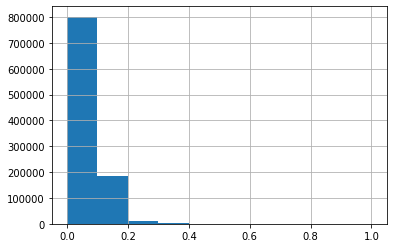

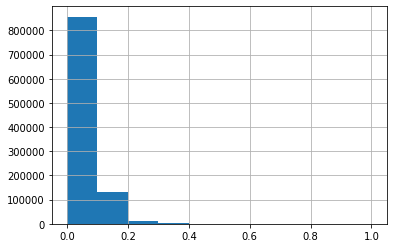

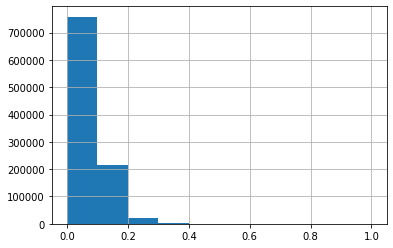

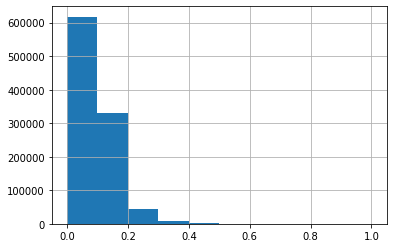

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

### Model

In [20]:
x.shape
y= np.asarray(y)

### Compile Model

### Fit Model

### Hyperparameters

hidden layers - tanh function  

initial weights - normal distribution with zero mean and std = 0.1 in first layer , 0.001 in the output layer and 0.05 in all other hidden layers

gradient computations on batch of size = 100


momentum - increased linearly over first 200 epochs from 0.9 to 0.99 , after which it is constant  

learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10 power -6

Training ended when momentum reached maximum value and min error on validation set had not decreased by more than a factor of 0.00001 over 10 epochs



### Custom SGD

In [13]:
def get_momentum(epoch):
    return min(epoch*(0.09/200),0.09)

def get_lrate(epoch):
    initial_lrate = 0.05
    lrate=initial_lrate/((1+epoch)*1.0000002)
    return max(10E-6,lrate)

<a id='modelinit'></a>
<a href="#weightmethods">Back to Top</a>

In [21]:
model_csgd = tf.keras.Sequential()
model_csgd.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_csgd.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_csgd.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_csgd.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_csgd.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_csgd.add(layers.Dense(1,activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001, seed=None)))

In [22]:
learning_rate=0.05
decay_rate=1E-5
sgd = SGD(lr=learning_rate,  decay=decay_rate, nesterov=False)
model_csgd.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [23]:
model_csgd.fit(scaled_train_df.values, y, epochs=5, batch_size=100)

Train on 1000000 samples
Epoch 1/5
1000000/1000000 [==============================] - 33s 33us/sample - loss: 7.2116 - accuracy: 0.5296 - loss: 7
Epoch 2/5
1000000/1000000 [==============================] - 36s 36us/sample - loss: 7.2116 - accuracy: 0.5297
Epoch 3/5
1000000/1000000 [==============================] - 33s 33us/sample - loss: 7.2116 - accuracy: 0.5297
Epoch 4/5
1000000/1000000 [==============================] - 32s 32us/sample - loss: 7.2116 - accuracy: 0.5297
Epoch 5/5
1000000/1000000 [==============================] - 33s 33us/sample - loss: 7.2116 - accuracy: 0.5297


In [28]:
import tensorflow.keras.backend as K
def scheduler(epoch):
    if epoch <= 200:
        k.set_value(self.model.optimizer.momentum, (0.09/200)*epoch)
    else:
        k.set_value(model.optimizer.momentum,0.09)
    return K.get_value(model.optimizer.momentum)

<a id='stopping'></a>
<a href="#stoppingmethods">Back to Top</a>

In [31]:
# learning schedule callback
lrate = LearningRateScheduler(get_lrate)
#momentum_upd = MomentumScheduler(scheduler)
earlystopper= EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=10)

callbacks_list = [lrate,earlystopper]

# Fit the model
model_csgd.fit(scaled_train_df.values, y, validation_split=0.3, epochs=40, batch_size=100, callbacks=callbacks_list, verbose=2)

Train on 700000 samples, validate on 300000 samples
Epoch 1/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 2/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 3/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 4/40
700000/700000 - 26s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 5/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 6/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 7/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 8/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_accuracy: 0.5301
Epoch 9/40
700000/700000 - 25s - loss: 7.2146 - accuracy: 0.5295 - val_loss: 7.2048 - val_ac

In [35]:
predictions_csgd = model_csgd.predict(np.asarray(scaled_train_df.values))
fpr_keras_csgd, tpr_keras_csgd, thresholds_keras_csgd = metrics.roc_curve(y,predictions_csgd,pos_label=None)
auc_keras_csgd = metrics.auc(fpr_keras_csgd, tpr_keras_csgd)
print(auc_keras_csgd)

0.5


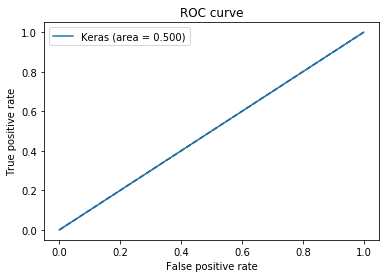

In [36]:
plt.figure(1)
plt.plot([0, 1], 'k--')
plt.plot(fpr_keras_csgd, tpr_keras_csgd, label='Keras (area = {:.3f})'.format(auc_keras_csgd))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<a id='adam'></a>
<a href="#stoppingmethods">Back to Results</a>

### newer model using 'adam' optimizer

In [37]:
model_new = tf.keras.Sequential()
model_new.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_new.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_new.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_new.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_new.add(layers.Dense(300, activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_new.add(layers.Dense(1,activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001, seed=None)))

In [38]:
model_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model_new.fit(scaled_train_df.values, y, validation_split=0.3, epochs=10, batch_size=200,  verbose=2)

Train on 700000 samples, validate on 300000 samples
Epoch 1/10
700000/700000 - 21s - loss: 0.6355 - accuracy: 0.6329 - val_loss: 0.6123 - val_accuracy: 0.6656
Epoch 2/10
700000/700000 - 21s - loss: 0.5889 - accuracy: 0.6853 - val_loss: 0.5758 - val_accuracy: 0.6956
Epoch 3/10
700000/700000 - 21s - loss: 0.5703 - accuracy: 0.7006 - val_loss: 0.5810 - val_accuracy: 0.6913
Epoch 4/10
700000/700000 - 22s - loss: 0.5585 - accuracy: 0.7096 - val_loss: 0.5614 - val_accuracy: 0.7080
Epoch 5/10
700000/700000 - 23s - loss: 0.5528 - accuracy: 0.7137 - val_loss: 0.5491 - val_accuracy: 0.7160
Epoch 6/10
700000/700000 - 21s - loss: 0.5462 - accuracy: 0.7184 - val_loss: 0.5414 - val_accuracy: 0.7229
Epoch 7/10
700000/700000 - 23s - loss: 0.5401 - accuracy: 0.7227 - val_loss: 0.5378 - val_accuracy: 0.7238
Epoch 8/10
700000/700000 - 22s - loss: 0.5341 - accuracy: 0.7271 - val_loss: 0.5309 - val_accuracy: 0.7291
Epoch 9/10
700000/700000 - 21s - loss: 0.5285 - accuracy: 0.7315 - val_loss: 0.5225 - val_ac

In [40]:
predictions_adam = model_new.predict(np.asarray(scaled_train_df.values))
fpr_keras_adam, tpr_keras_adam, thresholds_keras_adam = metrics.roc_curve(y,predictions_adam,pos_label=None)
auc_keras_adam = metrics.auc(fpr_keras_adam, tpr_keras_adam)
print(auc_keras_adam)

0.8229165258346218


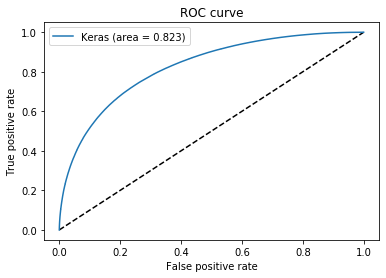

In [41]:
plt.figure(1)
plt.plot([0, 1], 'k--')
plt.plot(fpr_keras_adam, tpr_keras_adam, label='Keras (area = {:.3f})'.format(auc_keras_adam))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()